In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import cv2
from tqdm import tqdm

In [ ]:
!mkdir data2
!unzip '/content/drive/MyDrive/archive (5).zip' -d '/content/data2'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
label_code = {'cloudy':0,'desert':1,'green_area':2,'water':3}
label_decode = ['cloudy','desert','green_area','water']

In [ ]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3
SAMPLES = 5631
CATEGORIES = 4 # 1 for binary classification problem

X = np.zeros((SAMPLES, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype='float32')       #np.uint8 float32
y = np.zeros((SAMPLES, CATEGORIES), dtype='int32')

In [ ]:
np.random.seed = 123

In [ ]:
i = 0
for root, dirname, filenames in os.walk('/content/data2/data'):
    for filename in tqdm(filenames):
        _path = os.path.join(root, filename)
        _img = cv2.imread(_path)
        _img = cv2.resize(_img,(IMG_WIDTH,IMG_HEIGHT))
        _img = _img.astype('float32')
        #_img = _img.reshape(128,128,3)
        _img = _img/255.0
        _img = np.flip(_img,(2))  #for RGB images 
        X[i,:,:,:3]  = _img
        _label = root.split('/')[-1]
        _index = label_code[_label]
        y[i,_index] = 1
        i += 1

0it [00:00, ?it/s]
100%|██████████| 1500/1500 [00:00<00:00, 1928.75it/s]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4504, 128, 128, 3)
(4504, 4)
(1127, 128, 128, 3)
(1127, 4)


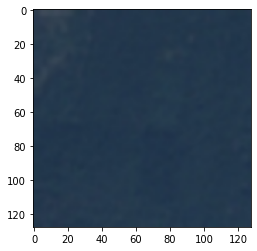

In [ ]:
plt.imshow(X_test[85,:,:,:3])

In [ ]:
j = np.argmax(y_test[85])

print(label_decode[j])

green_area


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

model = Sequential()
model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(Conv2D(4, (3, 3), activation='relu'))
model.add(Conv2D(4, (2,2),activation= 'relu'))
model.add(Dropout(0.5, input_shape=(2,)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 8)       224       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 4)       292       
                                                                 
 conv2d_2 (Conv2D)           (None, 123, 123, 4)       68        
                                                                 
 dropout (Dropout)           (None, 123, 123, 4)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 61, 61, 4)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 14884)             0         
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
hist = model.fit(x = X_train, y = y_train, batch_size = 40, validation_data= (X_test,y_test), epochs=20, verbose=1)

Epoch 1/20
113/113 [==============================] - 4s 33ms/step - loss: 0.2847 - accuracy: 0.8790 - val_loss: 0.3094 - val_accuracy: 0.8909
Epoch 2/20
113/113 [==============================] - 4s 31ms/step - loss: 0.2682 - accuracy: 0.8890 - val_loss: 0.3514 - val_accuracy: 0.8891
Epoch 3/20
113/113 [==============================] - 3s 31ms/step - loss: 0.2895 - accuracy: 0.8830 - val_loss: 0.3128 - val_accuracy: 0.8917
Epoch 4/20
113/113 [==============================] - 3s 31ms/step - loss: 0.2647 - accuracy: 0.8885 - val_loss: 0.2767 - val_accuracy: 0.9113
Epoch 5/20
113/113 [==============================] - 3s 31ms/step - loss: 0.2581 - accuracy: 0.8968 - val_loss: 0.3361 - val_accuracy: 0.8421
Epoch 6/20
113/113 [==============================] - 4s 31ms/step - loss: 0.2811 - accuracy: 0.8837 - val_loss: 0.3138 - val_accuracy: 0.8882
Epoch 7/20
113/113 [==============================] - 3s 31ms/step - loss: 0.2701 - accuracy: 0.8939 - val_loss: 0.3618 - val_accuracy: 0.8563

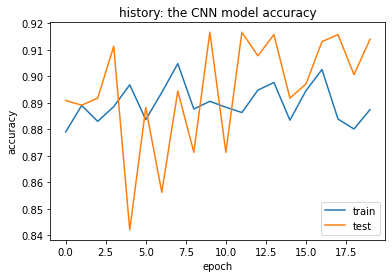

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('history: the CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

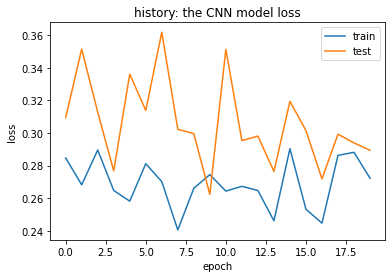

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('history: the CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

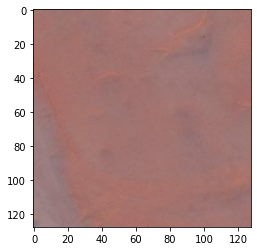

In [ ]:
path2 = '/content/data2/data/desert/desert(100).jpg'
img = cv2.imread(path2)
img = cv2.resize(img,(128,128))
img = img.astype('float32')
img = img/255.0
img = np.flip(img,(2))
plt.imshow(img)
img = img.reshape(1,128,128,3)

In [ ]:
y1 = model.predict(img)

In [ ]:
print(label_decode[np.argmax(y1)])

desert


In [ ]:
model.save_weights('wt21.h5')

In [ ]:
#model.load_weights('./wt21.h5')